## Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../")

In [36]:
from src.nnsrc.dense import NeuralNetwork

## Classification on exemplary provided datasets

### Binary classification

In [13]:
data = pd.read_csv('../src/data/classification/data.simple.test.100.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 1], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid'],
                    bias=True, problem='classification_binary')
print("Shape of NN:")
for layer in nn.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 1


In [14]:
y = y-1  # for binary crossentropy
nn.train(X.T, y, 20000, 0.7)

print("CLASSIFICATION DONE")
y_hat = nn.predict(X.T)

CLASSIFICATION DONE


In [15]:
nn.get_binary_accuracy_value(y_hat, y)

1.0

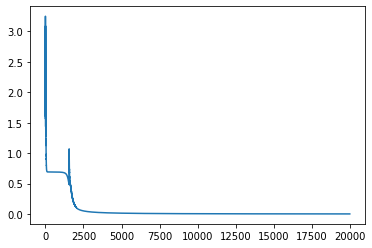

In [19]:
plt.plot(list(range(len(nn.history['cost']))), nn.history['cost'])

### Multiclass classification

In [37]:
data = pd.read_csv('../src/data/classification/data.three_gauss.train.500.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn2 = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 3], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'softmax'],
                    bias=True, problem='classification')
print("Shape of NN:")
for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 3


In [38]:
y = y-1
nn2.train(X.T, y, 2000, 0.7)

print("CLASSIFICATION DONE")
y_hat = nn2.predict(X.T)

CLASSIFICATION DONE


In [39]:
y_hat

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [29]:
nn2.get_multiclass_accuracy(y_hat, y)

IndexError: tuple index out of range

## Classification on external datasets

In [7]:
data = pd.read_csv('../src/data/classification_ext/SAheart.data.txt')


In [8]:
data

,160,12,5.73,23.11,49,25.3,97.2,52
0,144,0.01,4.41,28.61,55,28.87,2.06,63
1,118,0.08,3.48,32.28,52,29.14,3.81,46
2,170,7.50,6.41,38.03,51,31.99,24.26,58
3,134,13.60,3.50,27.78,60,25.99,57.34,49
4,132,6.20,6.47,36.21,62,30.77,14.14,45
...,...,...,...,...,...,...,...,...
456,214,0.40,5.98,31.72,64,28.45,0.00,58
457,182,4.20,4.41,32.10,52,28.61,18.72,52
458,108,3.00,1.59,15.23,40,20.09,26.64,55
459,118,5.40,11.61,30.79,64,27.35,23.97,40
